In [2]:
#Import all the neccessary libraries

import pandas as pd
import time 
import numpy as np 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.shape

(205, 26)

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df.drop('car_ID', axis = 1,inplace = True)

In [11]:
correlation = df.corr()
correlation

C:\Users\Red Devil\AppData\Local\Temp\ipykernel_12516\3035769115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


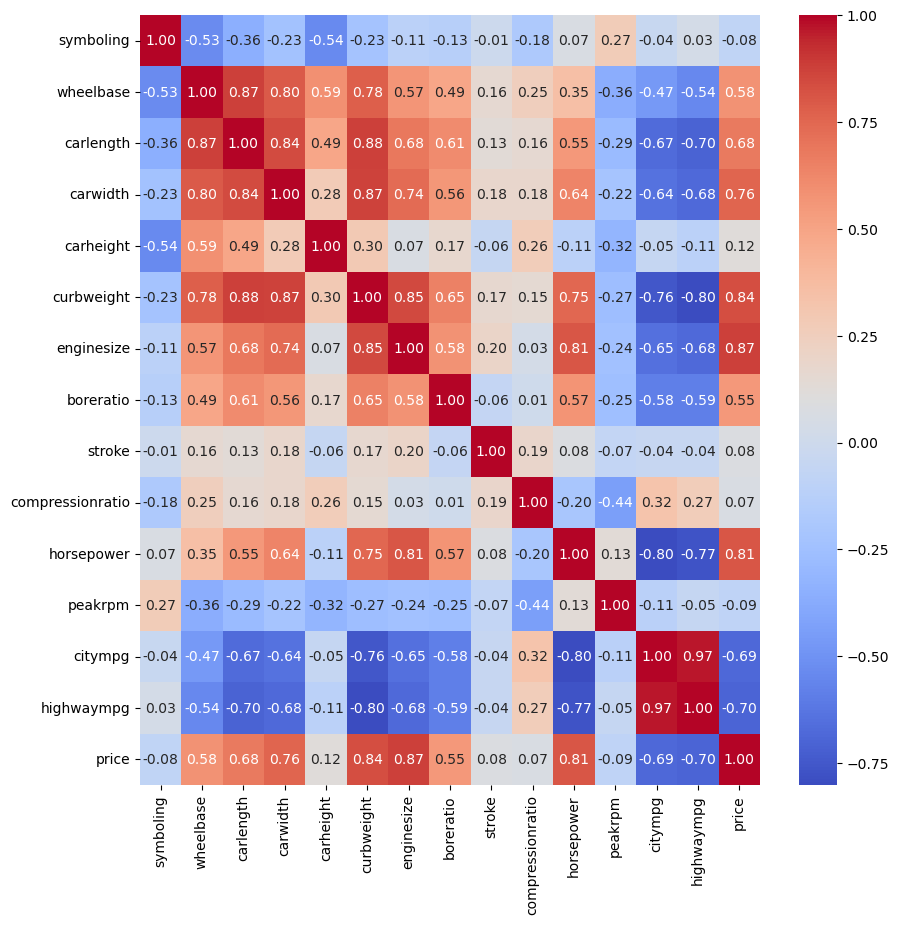

In [13]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation,annot = True,cmap = 'coolwarm',fmt='.2f')
plt.show()

In [14]:
numerical = []
categorical = []
def get_num_and_cato(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            numerical.append(column)
        else:
            categorical.append(column)

In [15]:
get_num_and_cato(df)

In [16]:
numerical

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [17]:
categorical

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [21]:
print(f"No. of unique values in CarName: {df['CarName'].nunique()}")
print(f"No. of unique values in fueltype: {df['fueltype'].nunique()}")
print(f"No. of unique values in aspiration: {df['aspiration'].nunique()}")
print(f"No. of unique values in doornumber: {df['doornumber'].nunique()}")
print(f"No. of unique values in carbody: {df['carbody'].nunique()}")
print(f"No. of unique values in driverwheel: {df['drivewheel'].nunique()}")
print(f"No. of unique values in enginelocation: {df['enginelocation'].nunique()}")
print(f"No. of unique values in enginetype: {df['enginetype'].nunique()}")
print(f"No. of unique values in cylindernumber: {df['cylindernumber'].nunique()}")
print(f"No. of unique values in fuelsystem: {df['fuelsystem'].nunique()}")

No. of unique values in CarName: 147
No. of unique values in fueltype: 2
No. of unique values in aspiration: 2
No. of unique values in doornumber: 2
No. of unique values in carbody: 5
No. of unique values in driverwheel: 3
No. of unique values in enginelocation: 2
No. of unique values in enginetype: 7
No. of unique values in cylindernumber: 7
No. of unique values in fuelsystem: 8


In [22]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [25]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [27]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [28]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [30]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [31]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [32]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [33]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [34]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder, MinMaxScaler

In [38]:
chang= LabelEncoder()
df["CarName"]=chang.fit_transform(df["CarName"])
df["fueltype"]=chang.fit_transform(df["fueltype"])
df["aspiration"]=chang.fit_transform(df["aspiration"])
df["doornumber"]=chang.fit_transform(df["doornumber"])
df["carbody"]=chang.fit_transform(df["carbody"])
df["drivewheel"]=chang.fit_transform(df["drivewheel"])
df["enginelocation"]=chang.fit_transform(df["enginelocation"])
df["enginetype"]=chang.fit_transform(df["enginetype"])
df["cylindernumber"]=chang.fit_transform(df["cylindernumber"])
df["fuelsystem"]=chang.fit_transform(df["fuelsystem"])

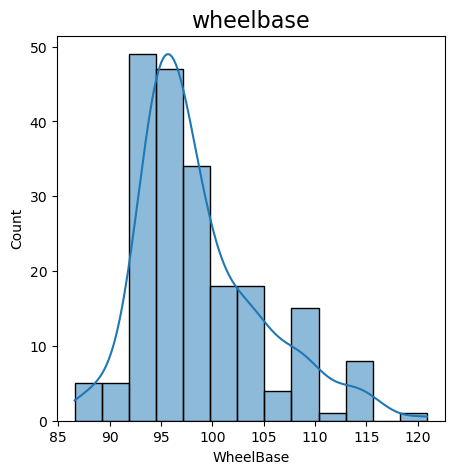

In [39]:
plt.figure(figsize = (5,5))
sns.histplot(df['wheelbase'],kde = True)
plt.title('wheelbase',fontsize = 16)
plt.xlabel('WheelBase')
plt.ylabel('Count')
plt.show()

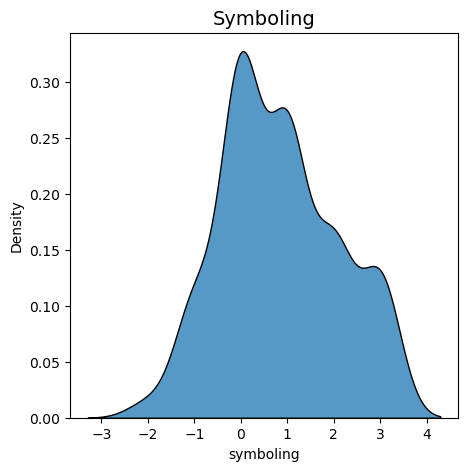

In [40]:
plt.figure(figsize = (5,5))
sns.kdeplot(data=df,x='symboling',hue = None,multiple='stack')
plt.title('Symboling',fontsize = 14)
plt.show()

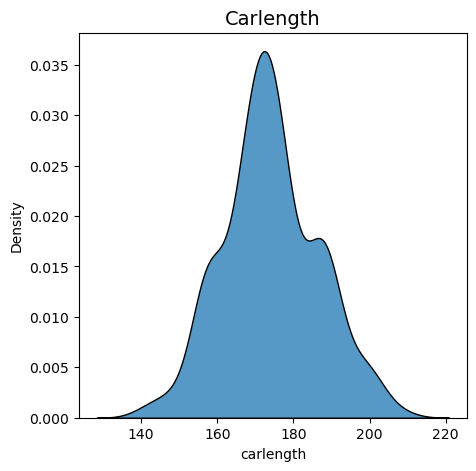

In [41]:
plt.figure(figsize = (5,5))
sns.kdeplot(data=df,x='carlength',hue = None,multiple='stack')
plt.title('Carlength',fontsize = 14)
plt.show()

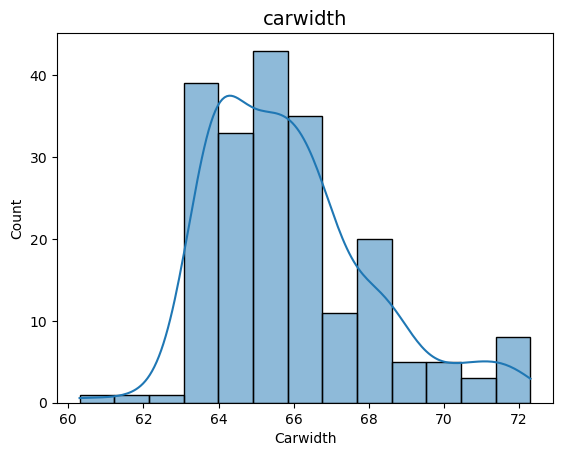

In [42]:
sns.histplot(df['carwidth'],kde = True)
plt.title('carwidth',fontsize = 14)
plt.xlabel('Carwidth')
plt.ylabel('Count')
plt.show()

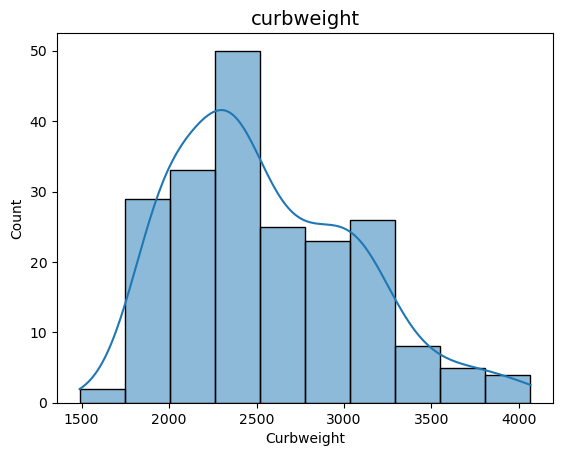

In [43]:
sns.histplot(df['curbweight'],kde = True)
plt.title('curbweight',fontsize = 14)
plt.xlabel('Curbweight')
plt.ylabel('Count')
plt.show()

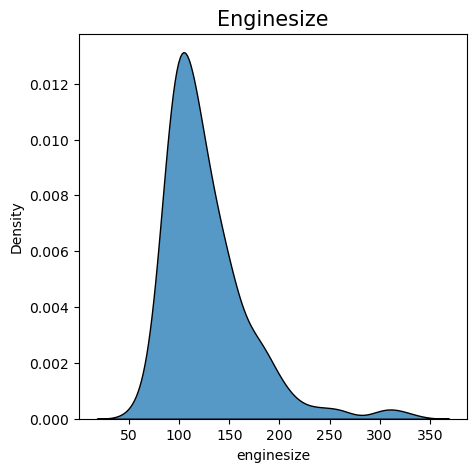

In [44]:
plt.figure(figsize = (5,5))
sns.kdeplot(data = df,x='enginesize',hue = None,multiple = 'stack')
plt.title('Enginesize',fontsize = 15)
plt.show()

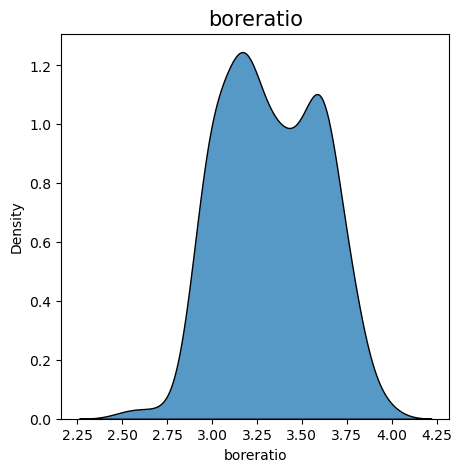

In [45]:
plt.figure(figsize = (5,5))
sns.kdeplot(data = df , x = 'boreratio',hue = None,multiple = 'stack')
plt.title('boreratio',fontsize = 15)
plt.show()

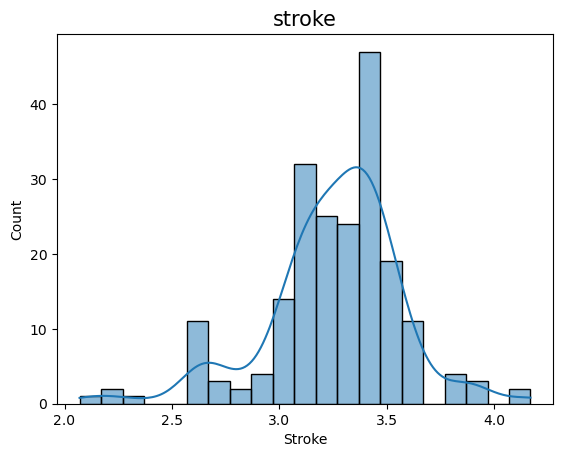

In [46]:
sns.histplot(df['stroke'],kde = True)
plt.title('stroke',fontsize=15)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

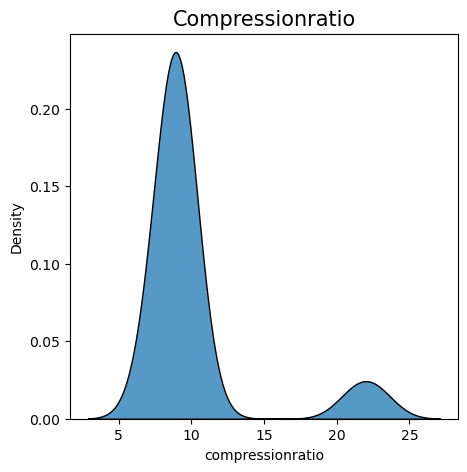

In [47]:
plt.figure(figsize = (5,5))
sns.kdeplot(data = df, x = 'compressionratio', hue = None, multiple = 'stack')
plt.title('Compressionratio', fontsize = 15)
plt.show()

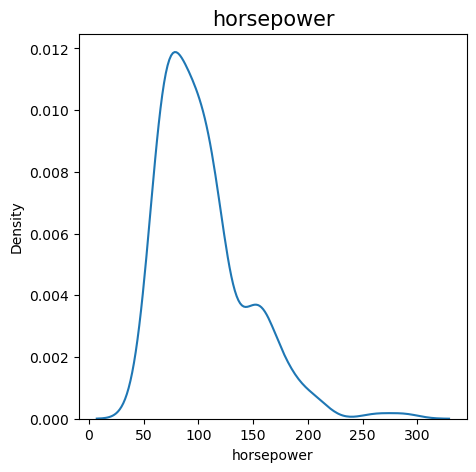

In [48]:
plt.figure(figsize = (5,5))
sns.kdeplot(data = df,x = 'horsepower',hue = None)
plt.title('horsepower',fontsize = 15)
plt.show()

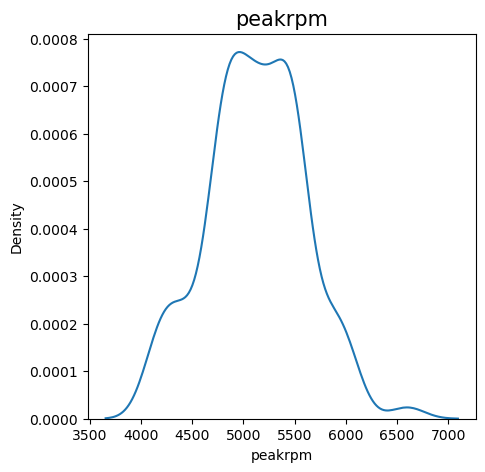

In [49]:
plt.figure(figsize = (5,5))
sns.kdeplot(data = df,x = 'peakrpm',hue = None)
plt.title('peakrpm', fontsize = 15)
plt.show()

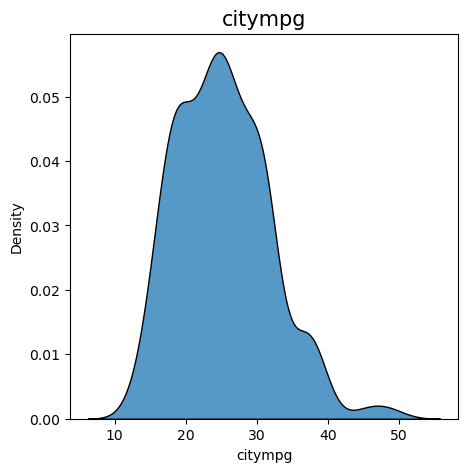

In [50]:
plt.figure(figsize = (5,5))
sns.kdeplot(data = df,x = 'citympg',hue = None,multiple = 'stack')
plt.title('citympg', fontsize = 15)
plt.show()

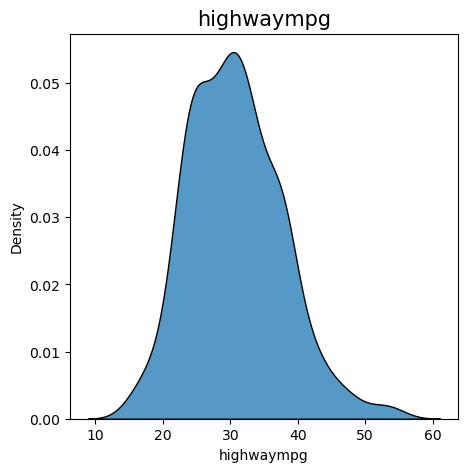

In [51]:
plt.figure(figsize = (5,5))
sns.kdeplot(data = df,x = 'highwaympg',hue = None,multiple = 'stack')
plt.title('highwaympg', fontsize = 15)
plt.show()

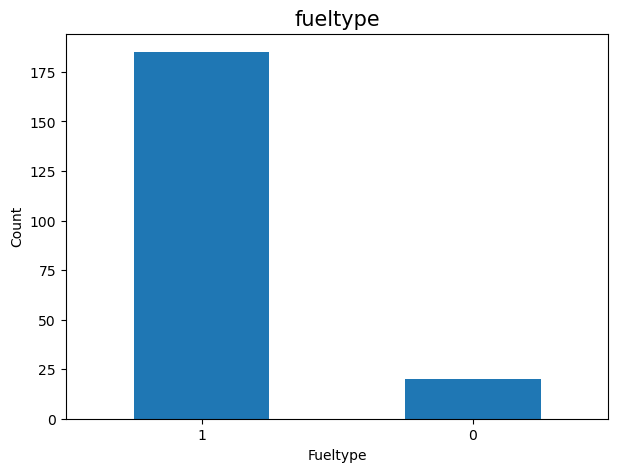

In [52]:
df['fueltype'].value_counts().plot(kind = 'bar',figsize = (7,5),rot = 0)
plt.title('fueltype',fontsize = 15)
plt.xlabel('Fueltype')
plt.ylabel('Count')
plt.show()

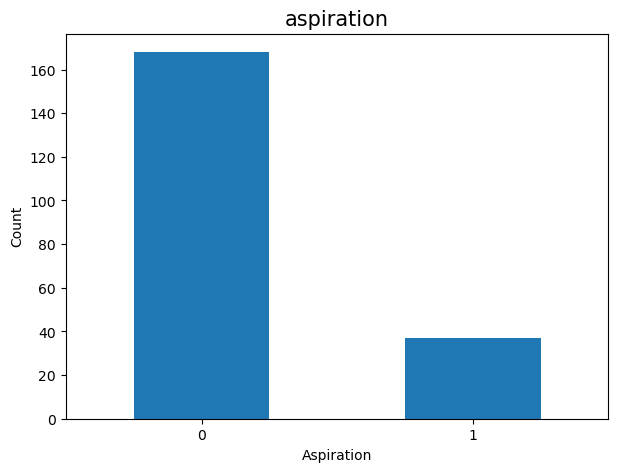

In [53]:
df['aspiration'].value_counts().plot(kind = 'bar',figsize = (7,5),rot = 0)
plt.title('aspiration',fontsize = 15)
plt.xlabel('Aspiration')
plt.ylabel('Count')
plt.show()

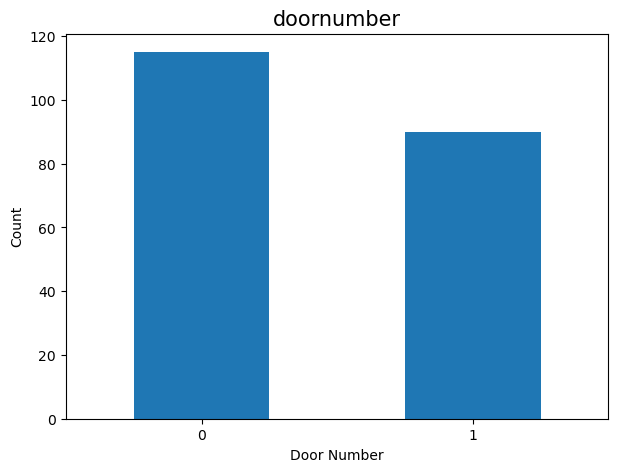

In [54]:
df['doornumber'].value_counts().plot(kind = 'bar',figsize = (7,5),rot = 0)
plt.title('doornumber',fontsize = 15)
plt.xlabel('Door Number')
plt.ylabel('Count')
plt.show()

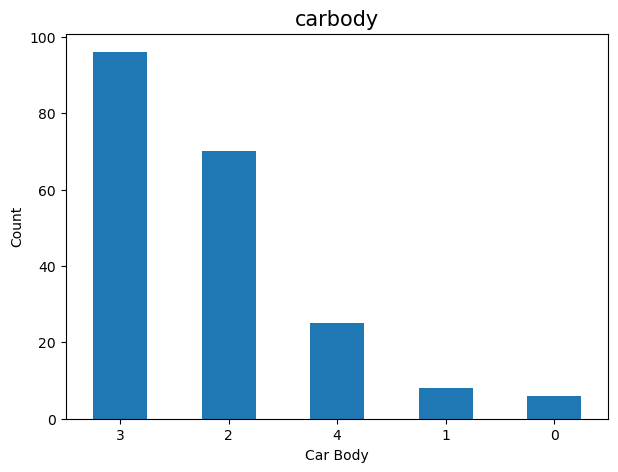

In [55]:
df['carbody'].value_counts().plot(kind = 'bar',figsize = (7,5),rot = 0)
plt.title('carbody',fontsize = 15)
plt.xlabel('Car Body')
plt.ylabel('Count')
plt.show()

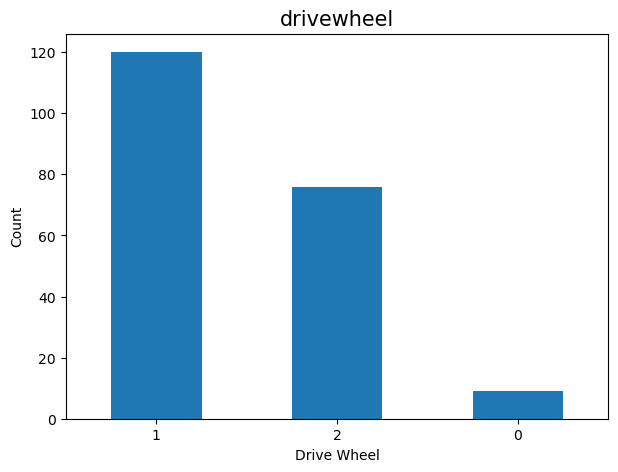

In [56]:
df['drivewheel'].value_counts().plot(kind = 'bar',figsize = (7,5),rot = 0)
plt.title('drivewheel',fontsize = 15)
plt.xlabel('Drive Wheel')
plt.ylabel('Count')
plt.show()

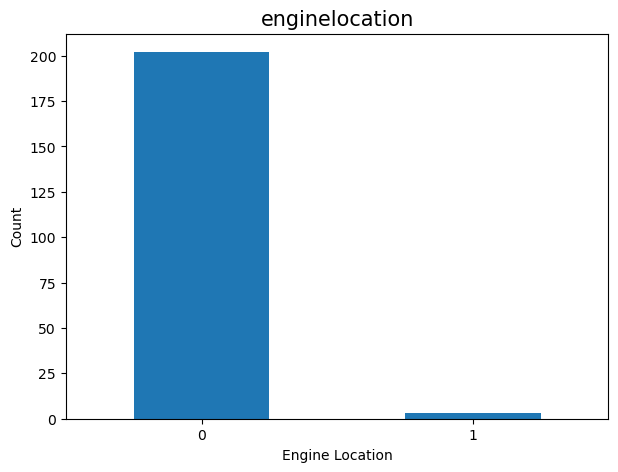

In [57]:
df['enginelocation'].value_counts().plot(kind = 'bar',figsize = (7,5),rot = 0)
plt.title('enginelocation',fontsize = 15)
plt.xlabel('Engine Location')
plt.ylabel('Count')
plt.show()

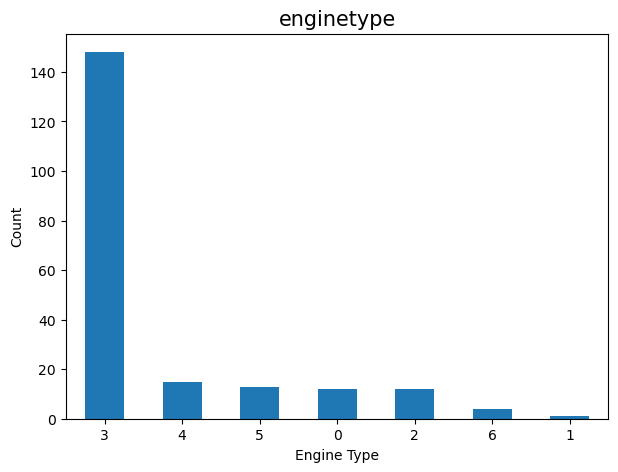

In [58]:
df['enginetype'].value_counts().plot(kind = 'bar',figsize = (7,5),rot = 0)
plt.title('enginetype',fontsize = 15)
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.show()

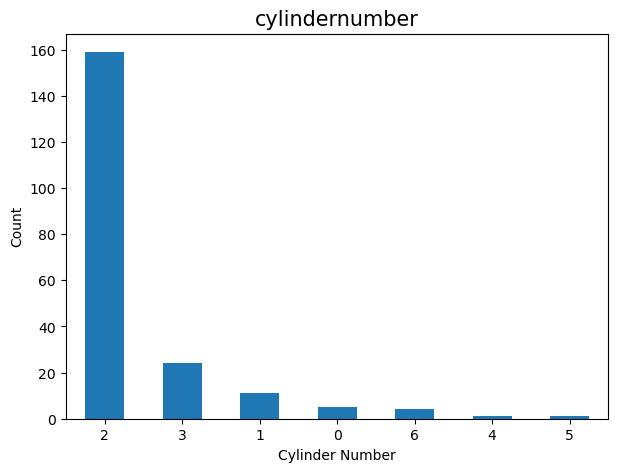

In [59]:
df['cylindernumber'].value_counts().plot(kind = 'bar',figsize = (7,5),rot = 0)
plt.title('cylindernumber',fontsize = 15)
plt.xlabel('Cylinder Number')
plt.ylabel('Count')
plt.show()

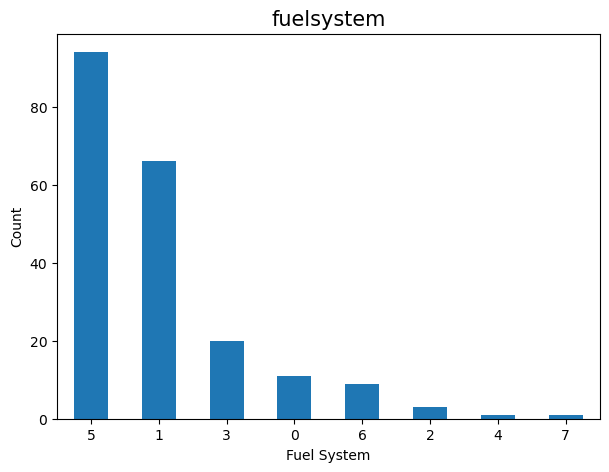

In [60]:
df['fuelsystem'].value_counts().plot(kind = 'bar',figsize = (7,5),rot = 0)
plt.title('fuelsystem',fontsize = 15)
plt.xlabel('Fuel System')
plt.ylabel('Count')
plt.show()

In [62]:
x_train, x_test, y_train, y_test=train_test_split(df.drop("price", axis=1),
                                                  df["price"],
                                                  test_size=0.3,
                                                  random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((143, 24), (143,), (62, 24), (62,))

In [67]:
ohe= OneHotEncoder(handle_unknown="ignore")

x_train_ohe= ohe.fit_transform(x_train[categorical])
x_train_ohe= x_train_ohe.toarray()

x_train_ohe_df= pd.DataFrame(x_train_ohe, columns=ohe.get_feature_names_out([categorical[i]  for i in range(len(categorical))]))

# One-hot encoding removed an index. Let's put it back:
x_train_ohe_df.index= x_train.index

# Joining the tables
x_train = pd.concat([x_train, x_train_ohe_df], axis=1)

# Dropping old categorical columns
x_train.drop(categorical, axis=1, inplace=True)

# Checking result
x_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_3,cylindernumber_5,cylindernumber_6,fuelsystem_0,fuelsystem_1,fuelsystem_2,fuelsystem_3,fuelsystem_5,fuelsystem_6,fuelsystem_7
177,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75,1,102.7,178.4,68.0,54.8,2910,140,3.78,3.12,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
174,-1,102.4,175.6,66.5,54.9,2480,110,3.27,3.35,22.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31,2,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [68]:
x_test_ohe= ohe.transform(x_test[categorical])
x_test_ohe= x_test_ohe.toarray()

x_test_ohe_df= pd.DataFrame(x_test_ohe, columns=ohe.get_feature_names_out([categorical[i] for i in range(len(categorical))]))
#print(x_test_ohe_df)

# One-hot encoding removed an index. Let's put it back:
x_test_ohe_df.index= x_test.index

# Joining the tables
x_test= pd.concat([x_test, x_test_ohe_df], axis=1)

# Dropping old categorical columns
x_test.drop(categorical, axis=1, inplace=True)

# Checking result
x_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_3,cylindernumber_5,cylindernumber_6,fuelsystem_0,fuelsystem_1,fuelsystem_2,fuelsystem_3,fuelsystem_5,fuelsystem_6,fuelsystem_7
15,0,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100,0,97.2,173.4,65.2,54.7,2302,120,3.33,3.47,8.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
132,3,99.1,186.6,66.5,56.1,2658,121,3.54,3.07,9.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
68,-1,110.0,190.9,70.3,58.7,3750,183,3.58,3.64,21.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [69]:
lng = LinearRegression()
lng.fit(x_train,y_train)
y_pred=lng.predict(x_test)

print(f"lng : {lng} and rmse score is : {np.sqrt(mean_squared_error(y_test,y_pred))}, r2 score is {r2_score(y_test,y_pred)}")

lng : LinearRegression() and rmse score is : 5582.465752701126, r2 score is 0.5502027368257523
